# Word Frequency Dictionary
This notebook is a record of my lab practice in the course "Natural Language Processing with Classification and Vector Spaces". It explores sentiment analysis of tweets using word frequencies and demonstrates the process of:

- Loading and exploring a dataset of positive and negative tweets.
- Building a word frequency dictionary to count the occurrences of words in relation to sentiment.
- Visualizing word counts to understand the distribution of words across positive and negative tweets.

####Setup and Imports

In [41]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # Sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # Visualization library
import numpy as np                         # Library for scientific computing and matrix operations
import random                              # Pseudo-random number generator
import re                                  # Library for regular expression operations
import string                              # For string operations

from nltk.corpus import stopwords          # Module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # Module for stemming
from nltk.tokenize import TweetTokenizer   # Module for tokenizing strings

#nltk.download('twitter_samples')
#nltk.download('stopwords')

##Exploring the Dataset

In [42]:
# Select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# Concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


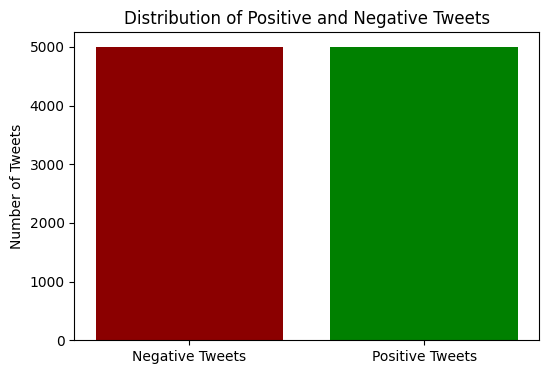

In [43]:
# Make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

# Count the occurrences of each label (0s and 1s)
label_counts = np.bincount(labels.astype(int))

# Create labels for the bars
categories = ['Negative Tweets', 'Positive Tweets']

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(categories, label_counts, color=['darkred', 'green'])
plt.ylabel('Number of Tweets')
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

##Building Dictionaries

###Adding or editing entries

In [44]:
# Create an empty dictionary
dictionary = {}

# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key3': -5, 'key1': 0}


###Accessing values and lookup keys

In [45]:
# Print a value
if 'key1' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key1 is not defined')

# Or use this
#print("item found: ", dictionary.get('key1', -1))

# Prints a message if key is not found
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('key does not exist!')

# Prints -1 because if key is not found and set the default to -1
print(dictionary.get('key7', -1))

item found:  0
key does not exist!
-1


##Building a Word frequency Dictionary

In [46]:
# Process tweet function
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Remove hyperlinks
    tweet = re.sub(r'https?://[^<\s]*[^<\s>]', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#', '', tweet)
    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # Remove stopwords
            word not in string.punctuation):  # Remove punctuation
            tweets_clean.append(word)

    tweets_stem = []
    for word in tweets_clean:
        stem_word = stemmer.stem(word)  # Stemming word
        tweets_stem.append(stem_word)

    return tweets_stem

In [52]:
# Create frequency dictionary
freqs = build_freqs(tweets, labels)

# Check data type
print(f'type(freqs) = {type(freqs)}')

# Check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13140


In [53]:
# Build frequencies
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {} # Initialize the dictionary
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet): # process_tweet is now defined in the same scope
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

##Table of Word Counts

In [57]:
# Select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# List representing our table of word counts.
# Each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# Loop through our selected words
for word in keys:

    # Initialize positive and negative counts
    pos = 0
    neg = 0

    # Rretrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # Retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # Append the word counts to the table
    data.append([word, pos, neg])

# Print header
print(f"{'Word':<15} {'Positive Count':<15} {'Negative Count':<15}")
print(f"{'-'*15:<15} {'-'*15:<15} {'-'*15:<15}") # Separator line

# Print data rows
for row in data:
    word, pos_count, neg_count = row
    print(f"{word:<15} {pos_count:<15} {neg_count:<15}")

Word            Positive Count  Negative Count 
--------------- --------------- ---------------
happi           212             25             
merri           1               0              
nice            99              19             
good            238             101            
bad             18              73             
sad             5               123            
mad             4               11             
best            65              22             
pretti          20              15             
❤               29              21             
:)              3691            2              
:(              1               4584           
😒               2               3              
😬               0               2              
😄               5               1              
😍               5               1              
♛               0               210            
song            22              27             
idea            27              10      

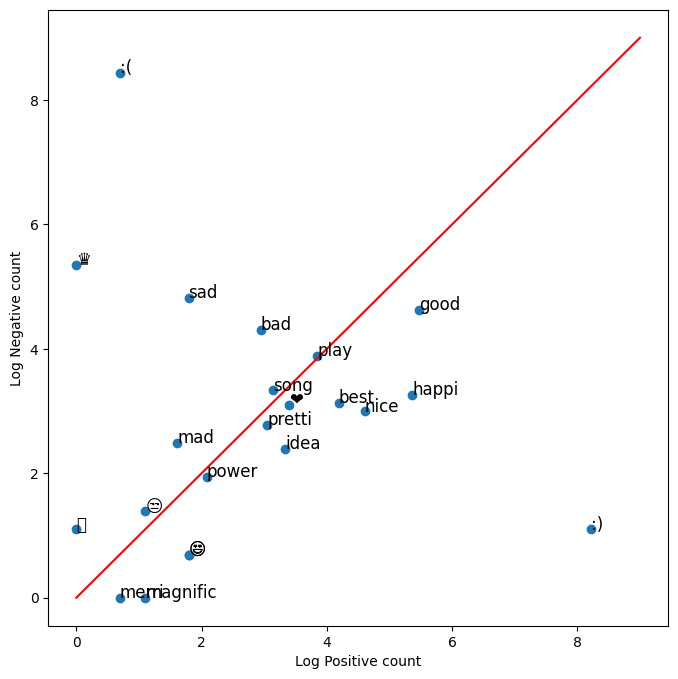

In [64]:
# Inspect thE table visually with a scatter plot

fig, ax = plt.subplots(figsize = (8, 8))

# Convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# Do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# Assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()